In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [2]:
# ----------------------------------
# 1. Load and Inspect the Dataset
# ----------------------------------
df = pd.read_excel("glass.xlsx") 
df
print("Initial Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

First few rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.2

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# ----------------------------------
# 2. EDA and Visualization
# ----------------------------------

In [5]:
# Checking for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
# Summary statistics
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.

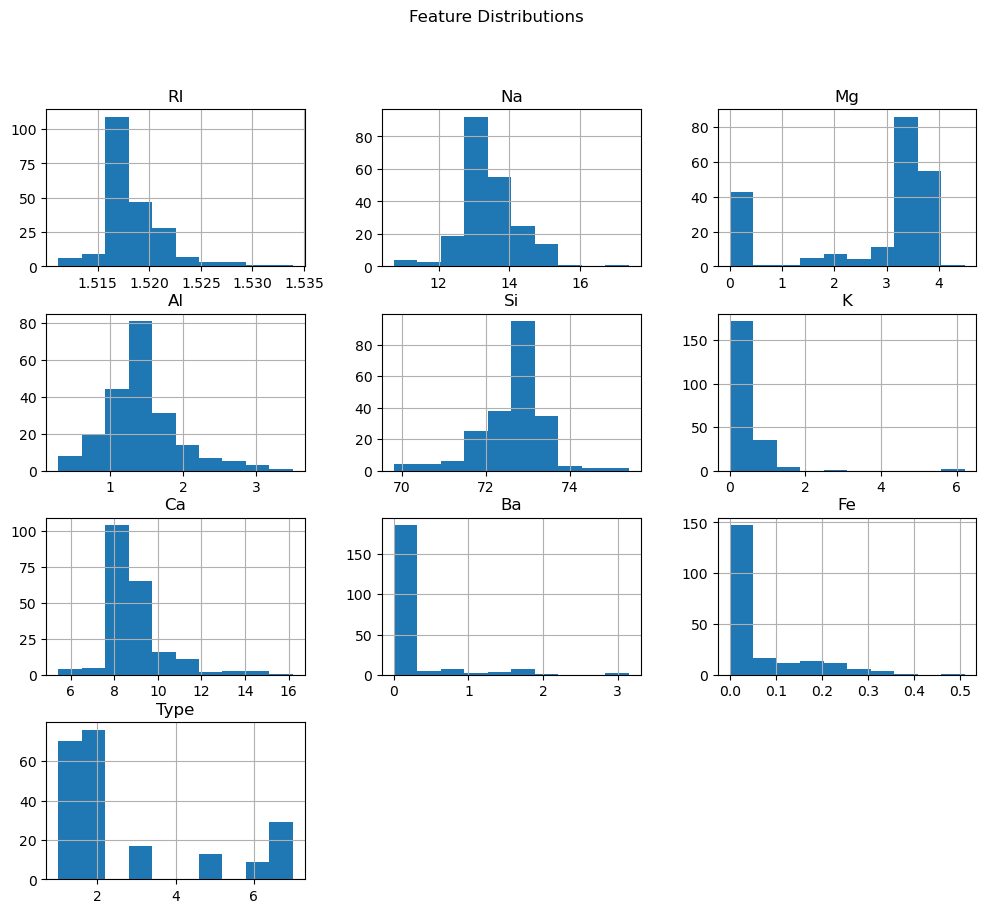

In [7]:
# Histograms
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

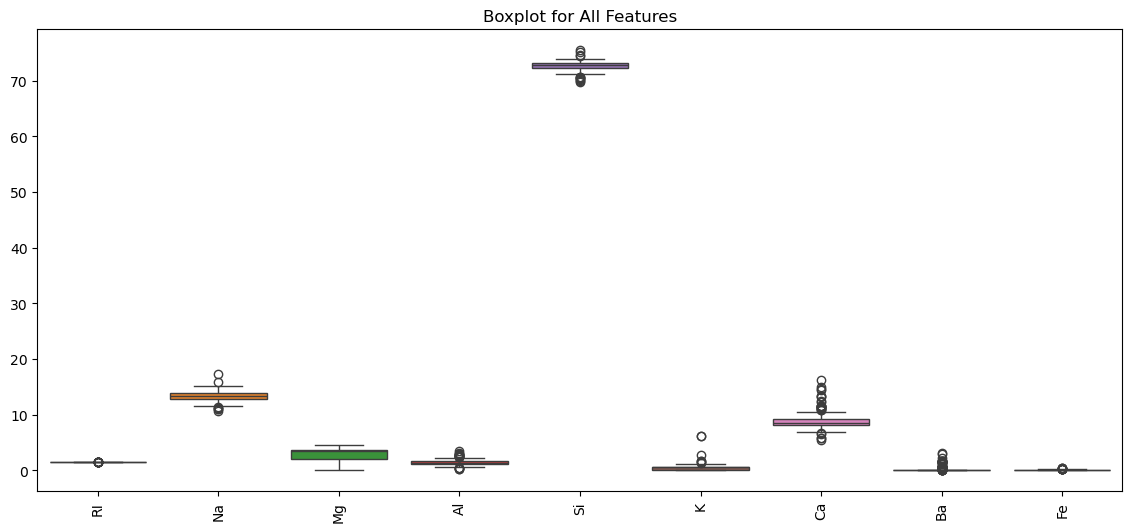

In [8]:
# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title("Boxplot for All Features")
plt.xticks(rotation=90)
plt.show()

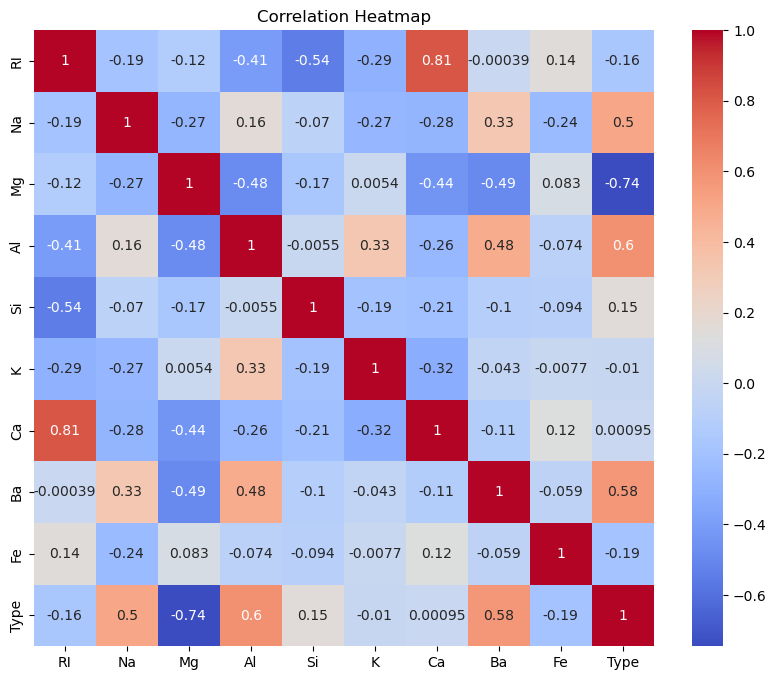

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

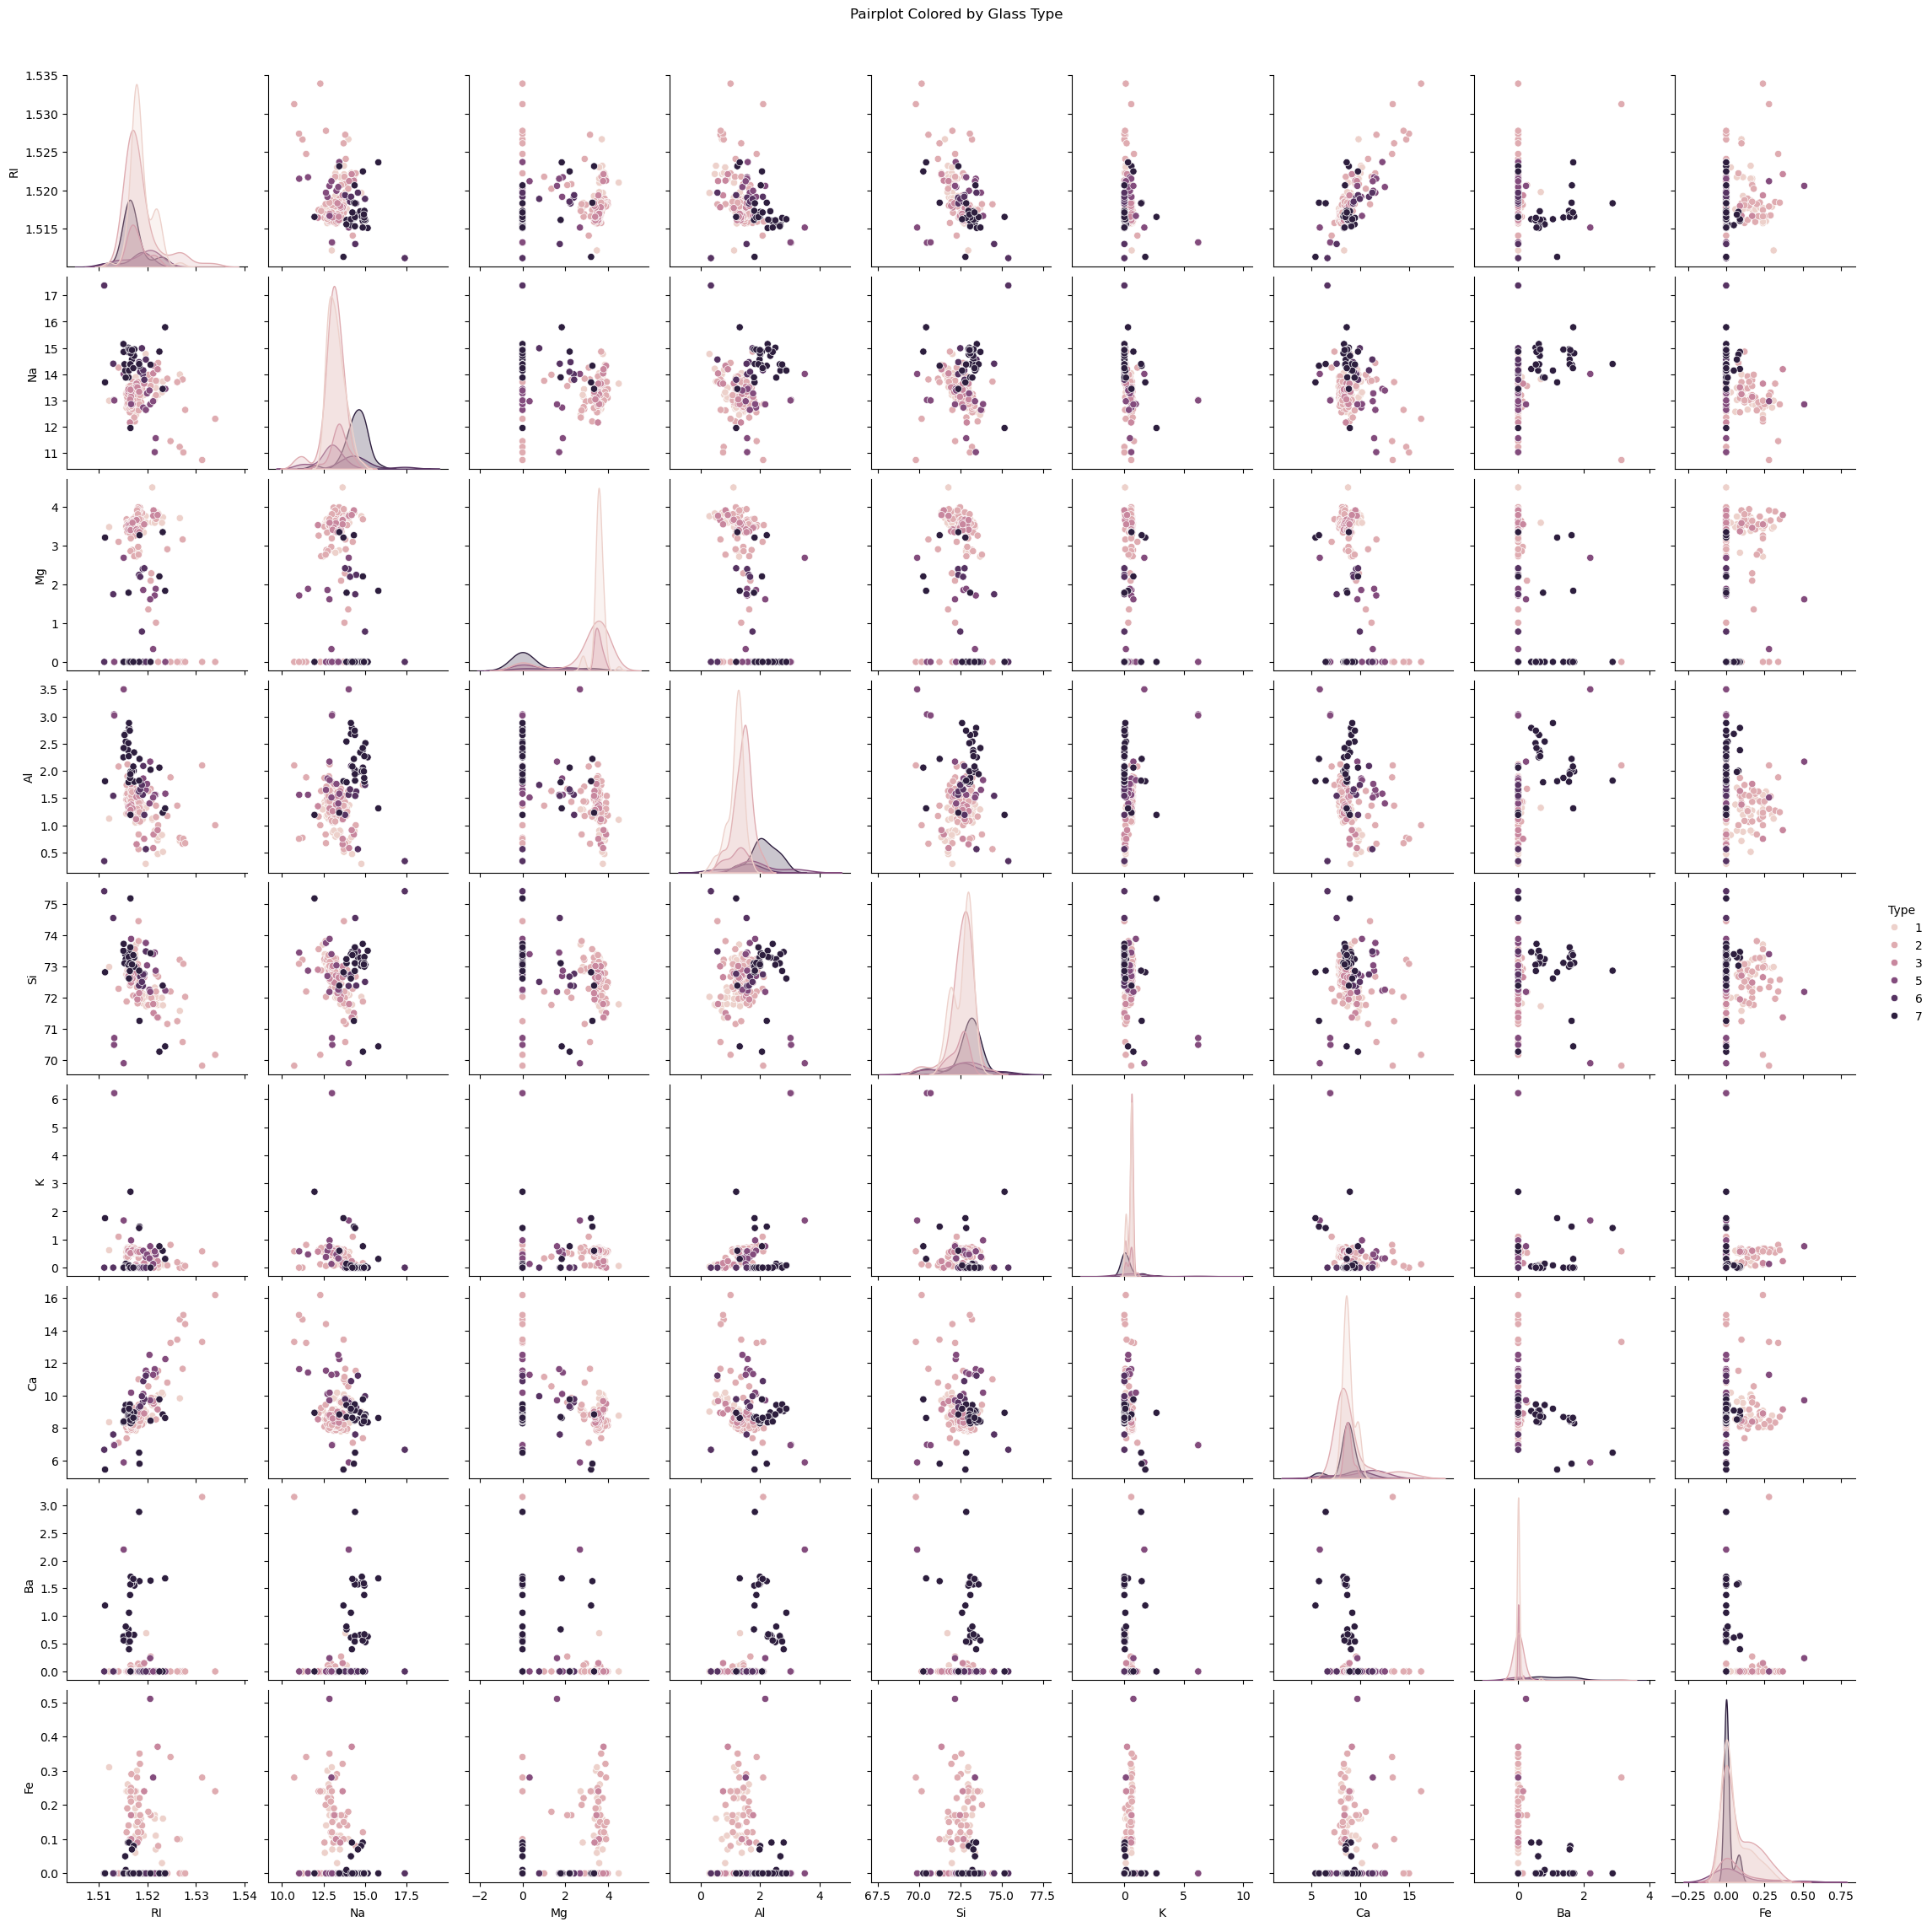

In [17]:
# Pair Plot
sns.pairplot(df, hue='Type')
plt.suptitle("Pairplot Colored by Glass Type", y=1.02)
plt.show()

In [11]:
# ----------------------------------
# 3. Data Preprocessing
# ----------------------------------

# No categorical variables to encode
# No missing values to handle

In [12]:
# Features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Class distribution
print("\nClass Distribution:\n", y.value_counts())


Class Distribution:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [18]:
# ----------------------------------
# 4. Random Forest Model
# ----------------------


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [20]:
# Evaluation
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


--- Random Forest ---
Accuracy: 0.813953488372093
Precision: 0.8261776982707214
Recall: 0.813953488372093
F1 Score: 0.8136212624584718

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



In [21]:
# ----------------------------------
# 5. Bagging and Boosting
# ----------------------------------


# Bagging Classifier (with Decision Trees)
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [22]:
# Boosting Classifier (AdaBoost)
boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)

C:\Users\akash\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

In [24]:
# Evaluate Bagging and Boosting
evaluate_model("Bagging", y_test, y_pred_bag)
evaluate_model("Boosting (AdaBoost)", y_test, y_pred_boost)


--- Bagging ---
Accuracy: 0.7906976744186046
Precision: 0.7946162364767015
Recall: 0.7906976744186046
F1 Score: 0.7889343214924611

--- Boosting (AdaBoost) ---
Accuracy: 0.5348837209302325
Precision: 0.4844961240310077
Recall: 0.5348837209302325
F1 Score: 0.4759961920304637


C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Interview Questions
Que 1-Explain Bagging and Boosting methods. How is it different from each other?

*Bagging trains many independent models in parallel on bootstrapped samples and averages their votes to slash variance (e.g., Random Forest).

*Boosting trains weak learners sequentially, each correcting the last, and combines them with weighted votes to slash bias (e.g., AdaBoost/XGBoost).

Que 2-Explain how to handle imbalance in the data?

*we can handle imbalance data by performing oversmapling or undersamplig technique to balance the data and go for f1score,preciison,recall to check the performance as there is no mistake in the model for the results